In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('./aqi_data.csv')

In [ ]:
df.head()

,country,aqi,co,datetime,no2,o3,pm10,pm25,so2,timestamp_local,timestamp_utc,ts
0,Albania,42.600002,198.60268,2022-10-26:14,0.034808,45.776367,20.490215,10.889340,0.484288,2022-10-26T19:00:00,2022-10-26T14:00:00,1666792800
1,Algeria,35.400000,199.60403,2022-10-26:15,0.034607,45.347214,20.559843,8.720495,0.506640,2022-10-26T20:00:00,2022-10-26T15:00:00,1666796400
2,Andorra,28.200000,199.93782,2022-10-26:16,0.034005,44.631958,20.810652,6.546653,0.521541,2022-10-26T21:00:00,2022-10-26T16:00:00,1666800000
3,Angola,21.000000,200.27160,2022-10-26:17,0.033469,44.345856,20.712862,4.397015,0.528991,2022-10-26T22:00:00,2022-10-26T17:00:00,1666803600
4,Argentina,20.000000,201.94054,2022-10-26:18,0.033469,43.988228,20.244165,4.394664,0.536442,2022-10-26T23:00:00,2022-10-26T18:00:00,1666807200


In [ ]:
df.isnull().sum()

country            0
aqi                0
co                 0
datetime           0
no2                0
o3                 0
pm10               0
pm25               0
so2                0
timestamp_local    0
timestamp_utc      0
ts                 0
dtype: int64

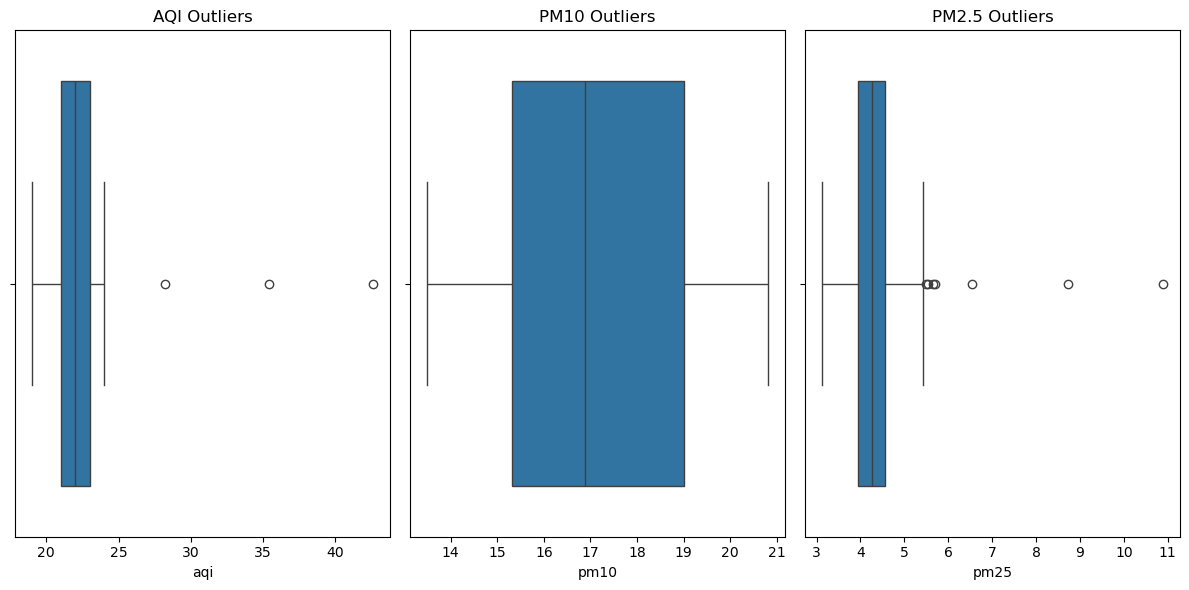

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for detecting outliers in AQI, PM10, and PM25
plt.figure(figsize=(12, 6))

# AQI Outliers
plt.subplot(1, 3, 1)
sns.boxplot(x=df['aqi'])
plt.title('AQI Outliers')

# PM10 Outliers
plt.subplot(1, 3, 2)
sns.boxplot(x=df['pm10'])
plt.title('PM10 Outliers')

# PM2.5 Outliers
plt.subplot(1, 3, 3)
sns.boxplot(x=df['pm25'])
plt.title('PM2.5 Outliers')

plt.tight_layout()
plt.show()


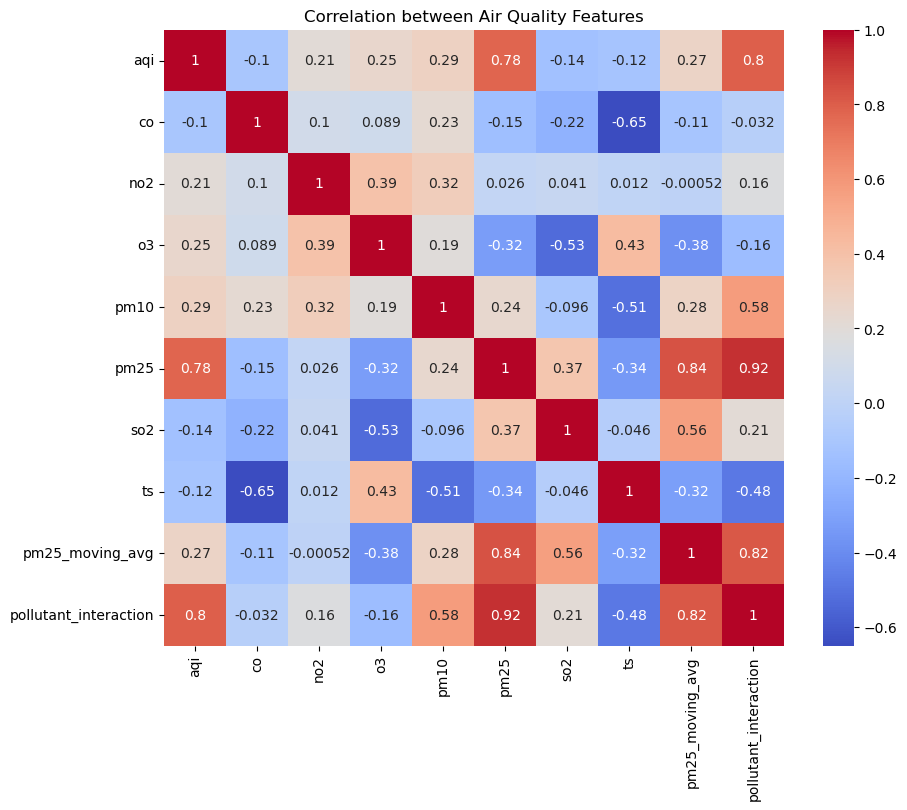

In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Now, generate the correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Air Quality Features')
plt.show()


In [ ]:
# Convert 'datetime' to datetime format, specifying the exact format
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d:%H')

# Extract time-based features (hour, day, month)
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month

# Check the first few rows to verify the conversion
print(df[['datetime', 'hour', 'day', 'month']].head())


             datetime  hour  day  month
0 2022-10-26 14:00:00    14   26     10
1 2022-10-26 15:00:00    15   26     10
2 2022-10-26 16:00:00    16   26     10
3 2022-10-26 17:00:00    17   26     10
4 2022-10-26 18:00:00    18   26     10


In [ ]:
# Check the column names to identify the correct feature names
print(df.columns)

# Update this part with the correct feature names
# For example, replace 'temperature' with 'temp' if that's the actual name
X = df[['pm10', 'pm25', 'co', 'no2', 'o3', 'so2']]  # Use actual column names
y = df['aqi']  # The target variable is AQI

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Index(['country', 'aqi', 'co', 'datetime', 'no2', 'o3', 'pm10', 'pm25', 'so2',
       'timestamp_local', 'timestamp_utc', 'ts', 'AQI Category',
       'pm25_moving_avg', 'pollutant_interaction', 'hour', 'day', 'month'],
      dtype='object')
Training set size: (57, 6)
Testing set size: (15, 6)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

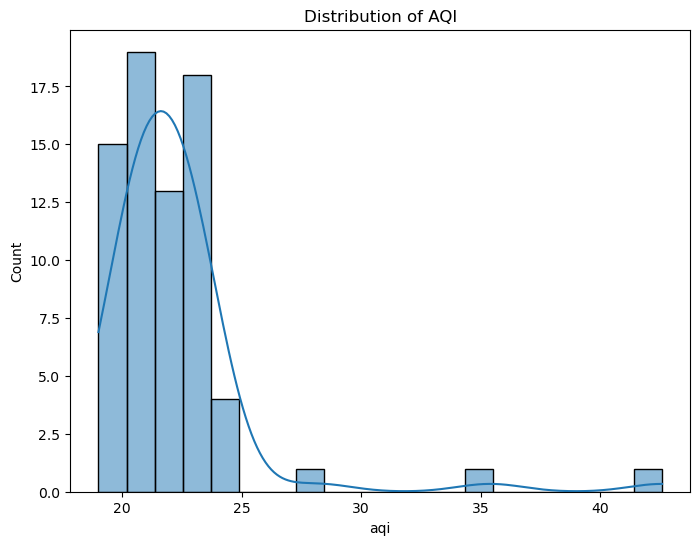

In [ ]:
# Plot distribution of AQI
plt.figure(figsize=(8, 6))
sns.histplot(df['aqi'], bins=20, kde=True)
plt.title('Distribution of AQI')
plt.show()

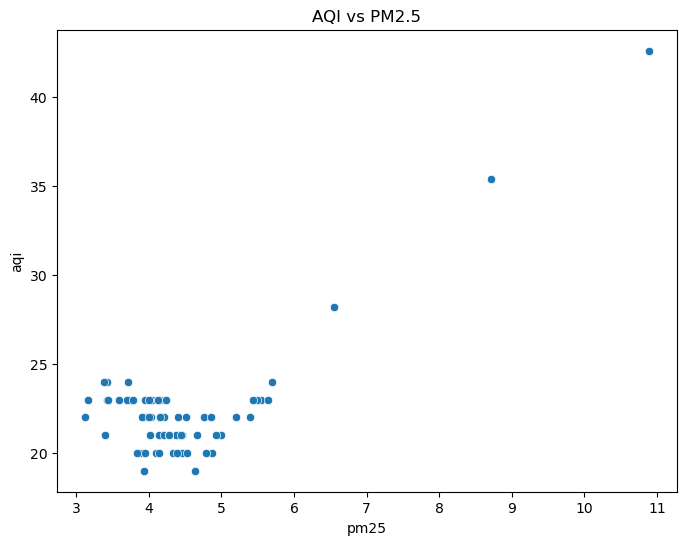

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pm25', y='aqi', data=df)
plt.title('AQI vs PM2.5')
plt.show()

In [ ]:
import pandas as pd

# Load your dataset (assuming it's already loaded in df)
df = pd.read_csv('NewDelhi_Air_quality (1).csv')

# Define a function to categorize AQI
def categorize_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

# Apply the function to create a new 'AQI Category' column
df['AQI Category'] = df['aqi'].apply(categorize_aqi)

# Save the updated DataFrame to a new CSV
df.to_csv('updated_aqi_data_with_category.csv', index=False)

print("Updated dataset with AQI categories saved.")


Updated dataset with AQI categories saved.


In [ ]:
df.head(7)

,country,aqi,co,datetime,no2,o3,pm10,pm25,so2,timestamp_local,timestamp_utc,ts,AQI Category
0,Albania,42.600002,198.60268,2022-10-26:14,0.034808,45.776367,20.490215,10.889340,0.484288,2022-10-26T19:00:00,2022-10-26T14:00:00,1666792800,Good
1,Algeria,35.400000,199.60403,2022-10-26:15,0.034607,45.347214,20.559843,8.720495,0.506640,2022-10-26T20:00:00,2022-10-26T15:00:00,1666796400,Good
2,Andorra,28.200000,199.93782,2022-10-26:16,0.034005,44.631958,20.810652,6.546653,0.521541,2022-10-26T21:00:00,2022-10-26T16:00:00,1666800000,Good
3,Angola,21.000000,200.27160,2022-10-26:17,0.033469,44.345856,20.712862,4.397015,0.528991,2022-10-26T22:00:00,2022-10-26T17:00:00,1666803600,Good
4,Argentina,20.000000,201.94054,2022-10-26:18,0.033469,43.988228,20.244165,4.394664,0.536442,2022-10-26T23:00:00,2022-10-26T18:00:00,1666807200,Good
5,Armenia,20.000000,205.27840,2022-10-26:19,0.033469,43.988228,20.306908,4.457184,0.536442,2022-10-27T00:00:00,2022-10-26T19:00:00,1666810800,Good
6,Australia,21.000000,206.94733,2022-10-26:20,0.033469,44.345856,20.308283,4.457888,0.536442,2022-10-27T01:00:00,2022-10-26T20:00:00,1666814400,Good


In [ ]:
# Example: Create a moving average of PM2.5
df['pm25_moving_avg'] = df['pm25'].rolling(window=3).mean()

# Example: Create an interaction term between pollutants
df['pollutant_interaction'] = df['pm25'] * df['pm10']


In [ ]:
# Calculate the moving average for PM2.5 over a window of 3 data points
df['pm25_moving_avg'] = df['pm25'].rolling(window=3).mean()

# Display the updated DataFrame
df[['pm25', 'pm25_moving_avg']].head()

,pm25,pm25_moving_avg
0,10.889340,NaN
1,8.720495,NaN
2,6.546653,8.718829
3,4.397015,6.554721
4,4.394664,5.112777


In [ ]:
# Create an interaction term between PM2.5 and PM10
df['pollutant_interaction'] = df['pm25'] * df['pm10']

# Display the updated DataFrame
df[['pm25', 'pm10', 'pollutant_interaction']].head()


,pm25,pm10,pollutant_interaction
0,10.889340,20.490215,223.124918
1,8.720495,20.559843,179.292008
2,6.546653,20.810652,136.240124
3,4.397015,20.712862,91.074765
4,4.394664,20.244165,88.966303


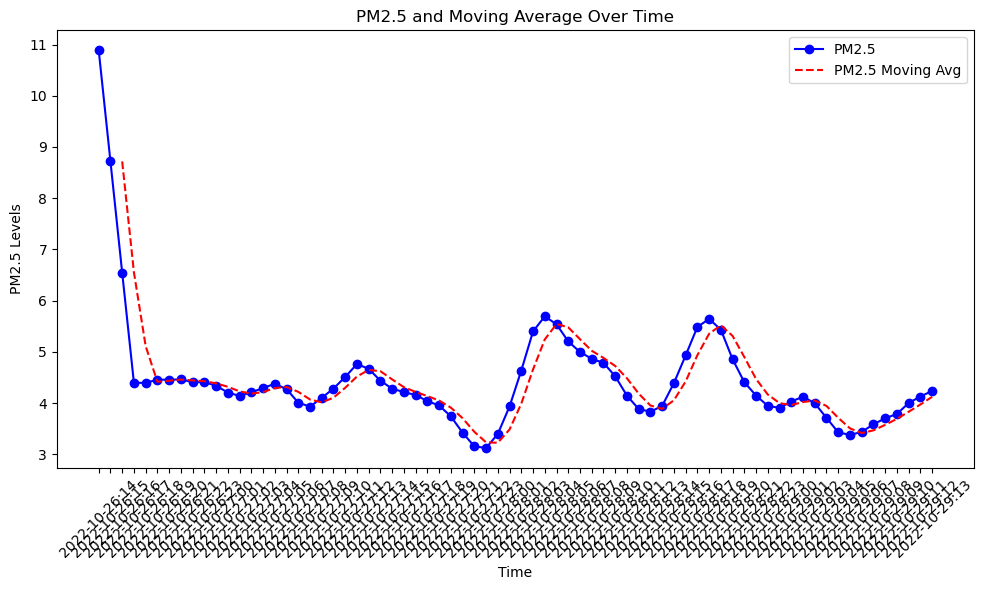

In [ ]:
import matplotlib.pyplot as plt

# Plot PM2.5 and its moving average
plt.figure(figsize=(10, 6))
plt.plot(df['datetime'], df['pm25'], label='PM2.5', color='blue', marker='o')
plt.plot(df['datetime'], df['pm25_moving_avg'], label='PM2.5 Moving Avg', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('PM2.5 Levels')
plt.title('PM2.5 and Moving Average Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


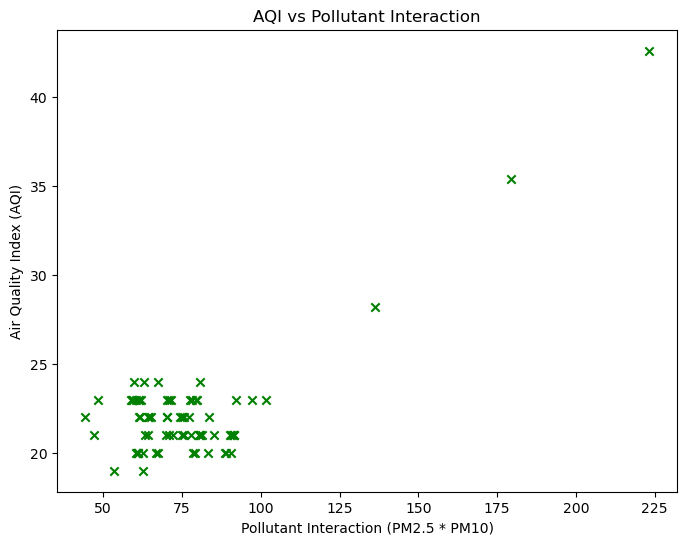

In [ ]:
# Scatter plot of AQI vs Pollutant Interaction
plt.figure(figsize=(8, 6))
plt.scatter(df['pollutant_interaction'], df['aqi'], color='green', marker='x')
plt.xlabel('Pollutant Interaction (PM2.5 * PM10)')
plt.ylabel('Air Quality Index (AQI)')
plt.title('AQI vs Pollutant Interaction')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
jkl
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 0.509330686437573
R² Score: 0.9831507174653669


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

# Evaluate the tuned model
best_rf_model = grid_search.best_estimator_
rf_y_pred = best_rf_model.predict(X_test)

# Calculate performance metrics
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"Tuned Random Forest MSE: {rf_mse}")
print(f"Tuned Random Forest R² Score: {rf_r2}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Random Forest MSE: 14.461798130233577
Tuned Random Forest R² Score: 0.5215860164258913


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"Random Forest Mean Squared Error: {rf_mse}")
print(f"Random Forest R² Score: {rf_r2}")


Random Forest Mean Squared Error: 10.462936640000244
Random Forest R² Score: 0.6538732491804482


In [ ]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target (y)
X = df[['pm25', 'pm10', 'co', 'no2', 'o3', 'pm25_moving_avg', 'pollutant_interaction']]
y = df['aqi']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import joblib

# Save the Linear Regression model to a file
joblib.dump(model, 'aqi_linear_model.pkl')


['aqi_linear_model.pkl']